<a href="https://colab.research.google.com/github/BearKS/Robotic-weed-control-system/blob/feature%2Fextraction/weed_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install opencv-python-headless
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
# Import the necessary libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [115]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [116]:
# Load path of segmentation mask image
image_path = "/content/gdrive/MyDrive/Project/sweet_basil/mask/0_output.png"

# # Load Pr mask from segmentation
# image_path = pr_mask

In [117]:
input_img,eroded_img,denoised_img = denoise_image(image_path)

In [118]:
def denoise_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, 0)
    # Check if image was loaded successfully
    if img is None:
        print('Error: Failed to load image at path:', image_path)
        return None

    else:
        # Define structuring elements
        kernel_rect = np.ones((20, 20), np.uint8)
        kernel_circ = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
        kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (8, 8))
        
        # Apply morphology operations with different kernels
        eroded_rect = cv2.erode(img, kernel_rect, iterations=3)
        dilated_rect = cv2.dilate(eroded_rect, kernel_rect, iterations=3)
    
        eroded_circ = cv2.erode(img, kernel_circ, iterations=3)
        dilated_circ = cv2.dilate(eroded_circ, kernel_circ, iterations=3)
    
        eroded_cross = cv2.erode(img, kernel_cross, iterations=3)
        dilated_cross = cv2.dilate(eroded_cross, kernel_cross, iterations=3)

        # Combine the eroded images
        eroded = cv2.bitwise_or(eroded_rect, eroded_circ)
        eroded = cv2.bitwise_or(eroded, eroded_cross)

        # Combine the denoised images
        denoised = cv2.bitwise_or(dilated_rect, dilated_circ)
        denoised = cv2.bitwise_or(denoised, dilated_cross)

        return img,eroded,denoised

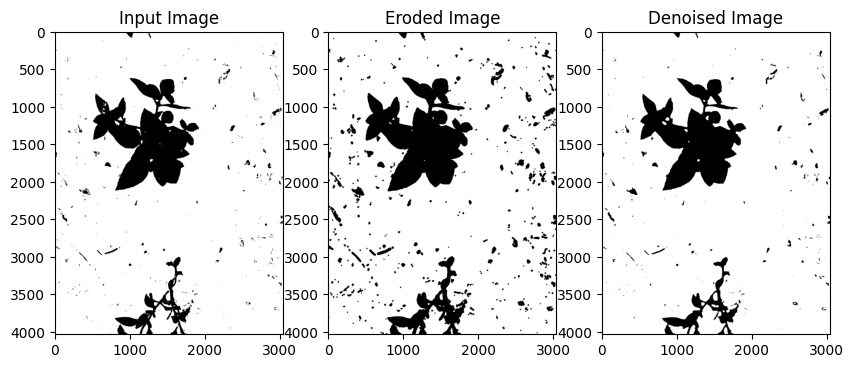

In [120]:
# Check if the denoised image was returned successfully
if denoised_img is not None:
    # Visualize the input and output images
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(input_img)
    ax[0].set_title('Input Image')
    ax[1].imshow(eroded_img)
    ax[1].set_title('Eroded Image')
    ax[2].imshow(denoised_img)
    ax[2].set_title('Denoised Image')
    plt.show()